In [2]:
from utils import get_artist, get_all_artists, get_biggest_by_lyrics_len
import matplotlib.pyplot as plt
import numpy as np

/home/tp/miniconda3/envs/mgr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-23 13:17:23.842370: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-23 13:17:23.871172: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 13:17:24.521021: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorR

In [2]:

all_arts = get_all_artists()
names = [a.name for a in get_all_artists()]
song_count = [len(a.songs) for a in get_all_artists()]

100%|██████████| 1049/1049 [00:03<00:00, 321.51it/s]


Text(0.5, 1.0, 'Distribution of number of songs per artist')

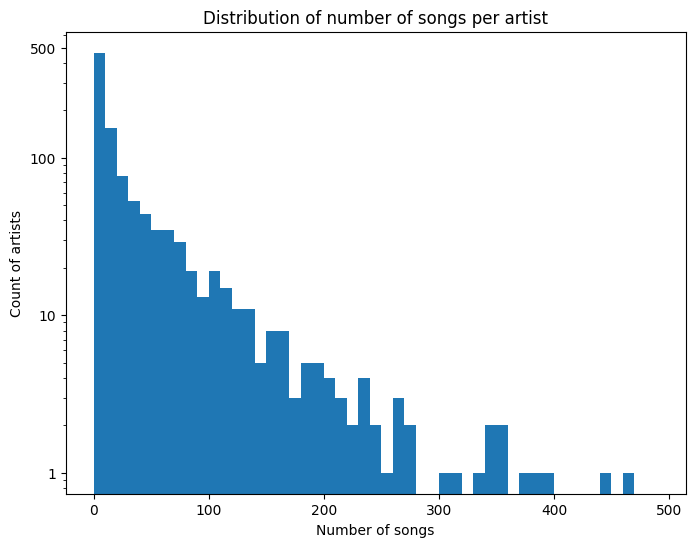

In [3]:


fig = plt.figure(figsize=(8,6))
plt.hist(song_count, bins=range(0, 500, 10), log=True)
plt.yticks([1, 10, 100, 500], ['1', '10', '100', '500'])
plt.xlabel('Number of songs')
plt.ylabel('Count of artists')
plt.title('Distribution of number of songs per artist')

In [4]:
# less than 10 songs
less_than_10 = len([c for c in song_count if c < 10])
print(less_than_10, less_than_10/len(song_count))

465 0.4432793136320305


In [5]:
# nr of collaborations vs solo songs

songs_ids = set()
has_collaborations = 0
no_collab = 0
for a in get_all_artists():
    for s in a.songs:
        if s.id in songs_ids:
            continue
        songs_ids.add(s.id)
        if s._body["featured_artists"]:
            has_collaborations += 1
        else:
            no_collab += 1
print(has_collaborations, no_collab)
print(has_collaborations/(has_collaborations+no_collab))

100%|██████████| 1049/1049 [00:03<00:00, 310.65it/s]

12563 19086
0.39694777086163857


In [6]:
biggests = get_biggest_by_lyrics_len(11, only_art=True)





100%|██████████| 1049/1049 [00:04<00:00, 246.65it/s].00it/s]
sorting artists by lyrics length: 1049it [00:04, 246.31it/s]


In [7]:
for big in biggests:
    print(big.name_sanitized, big._lyrics_len_prim_art, big._lyrics_len_all, big.lyrics_len_only_art)

Tede 221918 312419 164452
O_S_T_R_ 155227 225791 126466
Pikers 116920 116920 103864
Vkie 99026 99026 80563
Peja 131646 242031 77015
Slums_Attack 104709 104709 73112
Dudek_P56 126051 126051 63829
Young_Igi 75471 106822 63549
Kartky 80494 99608 62209
donGURALesko 81852 140230 61939
Filipek 93948 163845 58654


In [8]:
biggests = get_biggest_by_lyrics_len(11, only_art=False)
len_all = []
len_only_art = []
len_prim_art = []
names = []
for big in biggests:
    print(big.name_sanitized, big._lyrics_len_prim_art, big._lyrics_len_all, big.lyrics_len_only_art)
    len_all.append(big.lyrics_len_all)
    len_only_art.append(big.lyrics_len_only_art)
    len_prim_art.append(big.lyrics_len_prim_art)
    names.append(big.name_sanitized)


100%|██████████| 1049/1049 [00:05<00:00, 204.54it/s].18it/s]
sorting artists by lyrics length: 1049it [00:05, 204.29it/s]

Tede 221918 312419 164452
Peja 131646 242031 77015
O_S_T_R_ 155227 225791 126466
Białas 75864 189886 44607
Paluch 79724 168342 44863
Filipek 93948 163845 58654
VNM 78025 158322 46189
Ten_Typ_Mes 79745 148069 48651
donGURALesko 81852 140230 61939
Sokół_POL 15659 126648 7930
Dudek_P56 126051 126051 63829


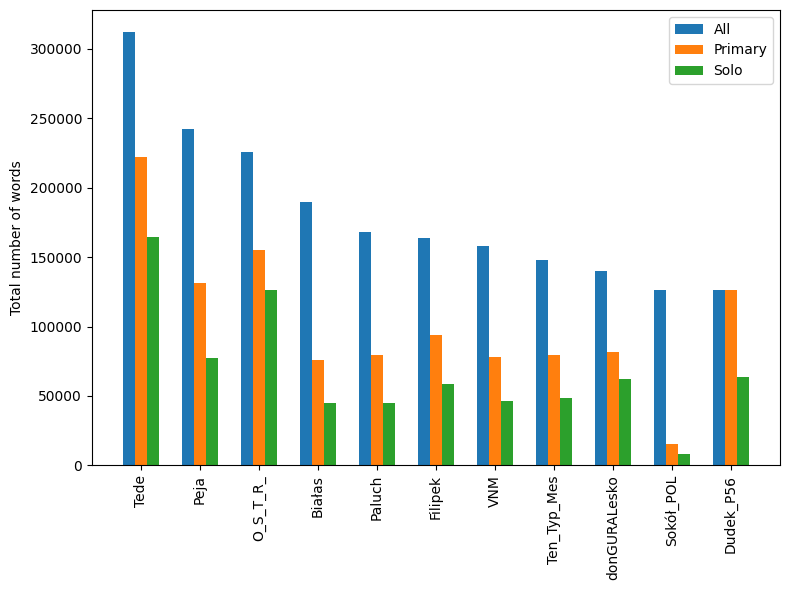

In [9]:

fig = plt.figure(figsize=(8,6))
bar_width = 0.2  # Adjust the width of the bars
bar_position = np.arange(len(names))  # Generate positions for the bars

plt.bar(bar_position - bar_width, len_all, width=bar_width, label='All')
plt.bar(bar_position , len_prim_art, width=bar_width, label='Primary')
plt.bar(bar_position + bar_width, len_only_art, width=bar_width, label='Solo')

plt.ylabel('Total number of words')

plt.xticks(bar_position, names, rotation=90)  # Set the x-axis tick labels
plt.legend()  # Show the legend

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()



In [10]:
# let's try get clustering with umap

top11 = get_biggest_by_lyrics_len(11, only_art=True)
from sklearn.decomposition import PCA
import numpy as np

import umap.umap_ as umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score




100%|██████████| 1049/1049 [00:04<00:00, 221.88it/s].54it/s]
sorting artists by lyrics length: 1049it [00:04, 221.62it/s]


In [75]:
[(len(a.songs), a.name_sanitized) for a in top11]

[(776, 'Tede'),
 (619, 'O_S_T_R_'),
 (396, 'Pikers'),
 (317, 'Vkie'),
 (463, 'Peja'),
 (183, 'Slums_Attack'),
 (301, 'Dudek_P56'),
 (377, 'Young_Igi'),
 (237, 'Kartky'),
 (344, 'donGURALesko'),
 (358, 'Filipek')]

In [76]:
songs_ds = [{"text": s.get_clean_song_lyrics(), "artists_name":a.name_sanitized} for s in a.songs[:200] for a in top11]
texts = [s["text"] for s in songs_ds]
artists = [s["artists_name"] for s in songs_ds]


In [77]:
len(songs_ds)

2200

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
X_train_texts, X_test_texts, y_train, y_test = train_test_split(texts, artists, test_size=0.2, random_state=42)

# vectorize
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_texts)
X_test = vectorizer.transform(X_test_texts)
# transform to tfidf
tfidf = TfidfTransformer(norm='l1')
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

X_test

<440x17811 sparse matrix of type '<class 'numpy.float64'>'
	with 119301 stored elements in Compressed Sparse Row format>

In [79]:
# mapping
mapper = umap.UMAP(metric="hellinger", random_state=42).fit(X_train)
import seaborn as sns
train_embedding = mapper.transform(X_train)
test_embedding = mapper.transform(X_test)

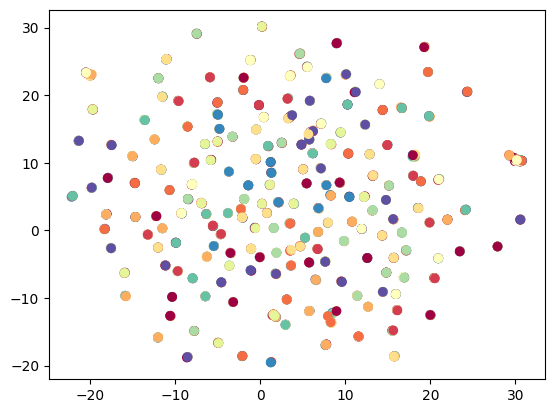

In [80]:
labels_to_int = {label: i for i, label in enumerate(set(y_train))}
plt.scatter(train_embedding[:, 0], train_embedding[:, 1], c=[labels_to_int[y] for y in y_train], cmap='Spectral')

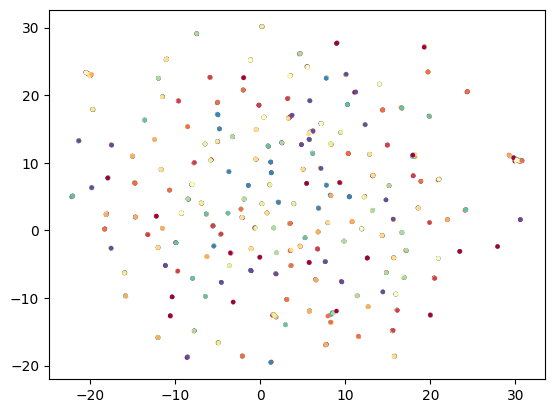

In [81]:
plt.scatter(train_embedding[:, 0], train_embedding[:, 1],c=[labels_to_int[y] for y in y_train], cmap='Spectral', s=5)

In [1]:
top30 = get_biggest_by_lyrics_len(30, only_art=True)

songs_nr = [len(a.songs) for a in top30]

plt.bar([a.name_sanitized for a in top30], songs_nr)

NameError: name 'get_biggest_by_lyrics_len' is not defined

In [28]:
PATH_NAME = "plots/bert_comparison/"
import pandas as pd
from pathlib import Path
path = Path(PATH_NAME)
names = ["30_solo","30_feats", "10_solo", "10_feats"]
for f in list(path.iterdir()):
    if f.suffix != ".csv" or not f.is_file():
        continue
    f_name = f.stem
    df = pd.read_csv(f)
    # split into df of 6 rows
    splits = [df.iloc[i:i+6] for i in range(0, len(df), 6)]
    for split, name in zip(splits, names):
        split.to_csv(path / f"{name}_{f_name}.csv", index=False)
    # f.rename(path / 'old'/ f.name)

Text(0, 0.5, 'Eval accuracy')

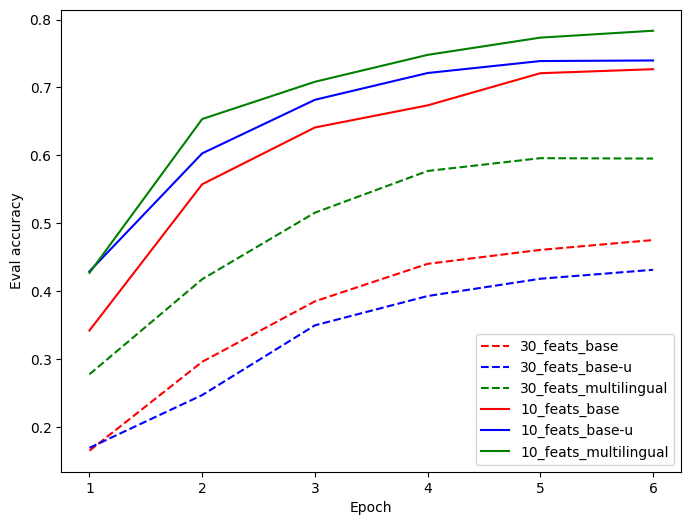

In [29]:

import matplotlib.pyplot as plt
y = range(1,7)
plt.figure(figsize=(8,6))
for f in list(path.iterdir()):
    if f.suffix != ".csv" or not f.is_file() or "solo" in f.stem:
        continue
    df = pd.read_csv(f)
    color = "b" if "uncased" in f.stem else "r"
    color = 'g' if 'multilingual' in f.stem else color
    style = "--" if "30" in f.stem else "-"
    name = "_".join(f.stem.split("_").pop(1))
    plt.plot(y, df["eval_accuracy"], color+style, label = name)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Eval accuracy")
